In [1]:


#importing numpy libarary, It provides support for large, multi-dimensional arrays and matrices
import numpy as np
#importing numpy libarary, It provides support for data manipulation and analysis. 
import pandas as pd
# importing matplotlib.pyplot plotting library in Python that provides a MATLAB-like interface for creating visualizations. 
import matplotlib.pyplot as plt

In [2]:
#Reading the csv file using pandas function and saved in data variable
data = pd.read_csv("50_Startups.csv")

In [3]:
data = pd.get_dummies(data, drop_first=True)#1st column is dropped, CA is dropped

In [4]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
dependet =data[["Profit"]]

independet =data[["R&D Spend","Administration", "Marketing Spend", "State_Florida","State_New York"]]

In [6]:
#importing train_test_split from sklearn.model_selection which is used for splitting the data into train and test
from sklearn.model_selection import train_test_split

In [7]:
#splitting Xtrain,X_test, y_train and y_test usiing train_test_split function. Train and test split ratio is 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(independet, dependet, test_size=0.30, random_state=0)

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='friedman_mse',max_features='auto',splitter='best')
regressor= regressor.fit(X_train,y_train)


In [120]:
regressor

DecisionTreeRegressor(criterion='friedman_mse', max_features='auto')

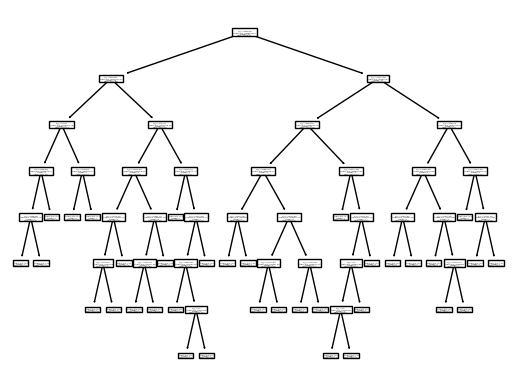

In [121]:
#import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()


In [122]:
#machine learning regressor (regressor) to make predictions and saved in y_pred variable
y_pred = regressor.predict(X_test)
y_pred

array([ 99937.59, 141585.52, 141585.52,  81005.76, 182901.99, 118474.03,
        81005.76, 101004.64, 118474.03, 156991.12, 107404.34,  89949.14,
       122776.86,  89949.14, 125370.37])

In [126]:
#importing r2_score libarary from sklearn.metrics for model evaulvation
from sklearn.metrics import r2_score
#checking r2 square value between y_test and y_pred
r2_score =r2_score(y_test,y_pred)
#printing r2 square value   #  standardising value
r2_score

0.9341860975535418

In [127]:
import pickle
#model saved in save fomat
filenmae = 'finalizedmodelDTmodelBest.sav'
#pickle.dump() serializes the regressor object and writes it to the specified file (filename) in binary mode ('wb').
pickle.dump(regressor, open(filenmae, 'wb'))

In [128]:
# the mode 'rb' used in file operations stands for "read binary" and saved in laoded model
loaded_model = pickle.load(open('finalizedmodelDTmodelBest.sav','rb'))
#using predict keyeword, predicting 15 years of experience of emplyee and predicted value store in result variable
result = loaded_model.predict([[12344,3445,45645,1,0]])
#pring the result
print(result)

[69758.98]


C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
